In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import descartes
import datetime as dt



In [38]:
Confirmed_Url= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
Death_Url= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
Recovered_Url= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [39]:
def get_melt_data(data_Urls, case_name):
    df= pd.read_csv(data_Urls)
    melt_data= df.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'])
    melt_data.rename(columns={"variable":"Date", "value":case_name}, inplace= True)
    return melt_data

In [40]:
df_confirmed= get_melt_data(Confirmed_Url, "Confirmed")
df_death= get_melt_data(Death_Url, "Death")
df_recovered=get_melt_data(Recovered_Url, "Recovered")

In [41]:
data= df_confirmed.join(df_death['Death']).join(df_recovered['Recovered'])

In [42]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [43]:
data.shape

(28143, 8)

In [44]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Death', 'Recovered'],
      dtype='object')

In [45]:
data.describe()

,Lat,Long,Confirmed,Death,Recovered
count,28143.000000,28143.000000,28143.000000,28143.000000,28143.000000
mean,30.965553,-34.570313,161.882457,5.494368,60.172903
std,19.365473,80.783759,2519.847218,109.294757,1346.659783
min,-41.454500,-157.858400,0.000000,0.000000,0.000000
25%,26.027500,-92.288400,0.000000,0.000000,0.000000
50%,37.648900,-74.053500,0.000000,0.000000,0.000000
75%,42.230200,21.745300,0.000000,0.000000,0.000000
max,71.706900,178.065000,67800.000000,4032.000000,58382.000000


In [46]:
data.isna().sum()

Province/State    9027
Country/Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Death                0
Recovered            0
dtype: int64

In [47]:
data_date=data.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum()
data_date

,Confirmed,Death,Recovered
Date,,,
1/22/20,555,17,28
1/23/20,653,18,30
1/24/20,941,26,36
1/25/20,1434,42,39
1/26/20,2118,56,52
1/27/20,2927,82,61
1/28/20,5578,131,107
1/29/20,6166,133,126
1/30/20,8234,171,143


In [48]:
data_max= data.groupby('Date')['Confirmed', 'Death', 'Recovered'].max()
data_max.idxmax()

Confirmed    3/18/20
Death        3/20/20
Recovered    3/20/20
dtype: object

In [49]:
data_min= data.groupby('Date')['Confirmed', 'Death', 'Recovered'].min()
data_min.idxmin()

Confirmed    1/22/20
Death        1/22/20
Recovered    1/22/20
dtype: object

In [50]:
data_country= data.groupby(['Country/Region'])['Confirmed','Death', 'Recovered'].sum()
data_country

,Confirmed,Death,Recovered
Country/Region,,,
Afghanistan,185,0,5
Albania,459,13,0
Algeria,651,45,140
Andorra,222,0,8
Angola,1,0,0
Antigua and Barbuda,8,0,0
Argentina,630,23,15
Armenia,532,0,4
Australia,4996,62,601


In [51]:
data_country_State=data.groupby(['Country/Region','Province/State'])['Confirmed','Death', 'Recovered'].max()
data_country_State

Confirmed  Death  Recovered
Country/Region Province/State                                           
Australia      Australian Capital Territory          6      0          0
               From Diamond Princess                 8      0          0
               New South Wales                     353      6          4
               Northern Territory                    3      0          0
               Queensland                          184      0          8
               South Australia                      50      0          3
               Tasmania                             10      0          3
               Victoria                            121      0          8
               Western Australia                    64      1          0
Canada         Alberta                             146      1          0
               British Columbia                    271      8          4
               Grand Princess                       10      0          0
               Manitoba                             17      0          0
               New Brunswick                        11      0          0
               Newfoundland and Labrador             4      0          0
               Nova Scotia                          15      0          0
               Ontario                             308      2          5
               Prince Edward Island                  2      0          0
               Quebec                              139      1          0
               Saskatchewan                         20      0          0
China          Anhui                               990      6        984
               Beijing                             491      8        390
               Chongqing                           576      6        570
               Fujian                              299      1        295
               Gansu                               134      2         98
               Guangdong                          1395      8       1323
               Guangxi                             254      2        250
               Guizhou                             147      2        144
               Hainan                              168      6        161
               Hebei                               318      6        310
...                                                ...    ...        ...
US             Union, NJ                             0      0          0
               Utah                                 80      0          0
               Ventura, CA                           0      0          0
               Vermont                              29      2          0
               Virgin Islands                        3      0          0
               Virginia                            122      2          0
               Volusia County, FL                    1      0          0
               Wake County, NC                       1      0          0
               Washington                         1524     83          1
               Washington County, OR                 8      0          0
               Washington, D.C.                      2      0          0
               Washoe County, NV                     2      0          0
               Wayne County, PA                      1      0          0
               Wayne, MI                             0      0          0
               Weber, UT                             0      0          0
               West Virginia                         7      0          0
               Westchester County, NY               98      0          0
               Whatcom, WA                           0      0          0
               Williamson County, TN                 1      0          0
               Wisconsin                           207      3          1
               Worcester, MA                         0      0          0
               Wyoming                              19      0          0
               Yolo County, CA

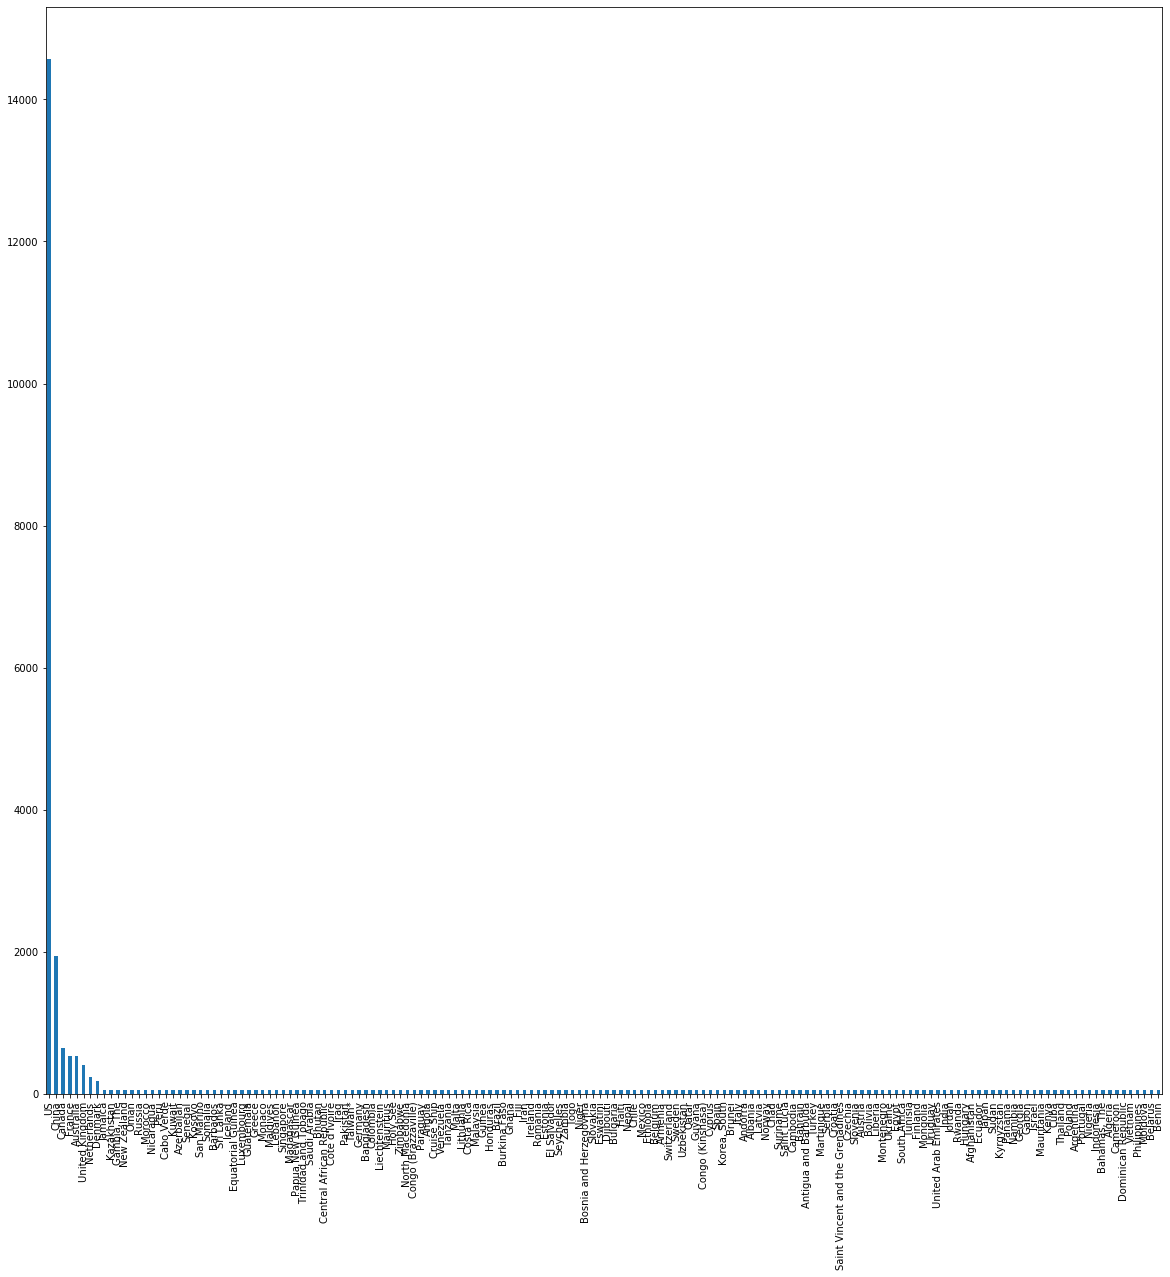

In [52]:
data['Country/Region'].value_counts().plot(kind='bar',figsize=(20,20))

In [53]:
geodata= gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Long'], data['Lat']))
geodata.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,geometry
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)


(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

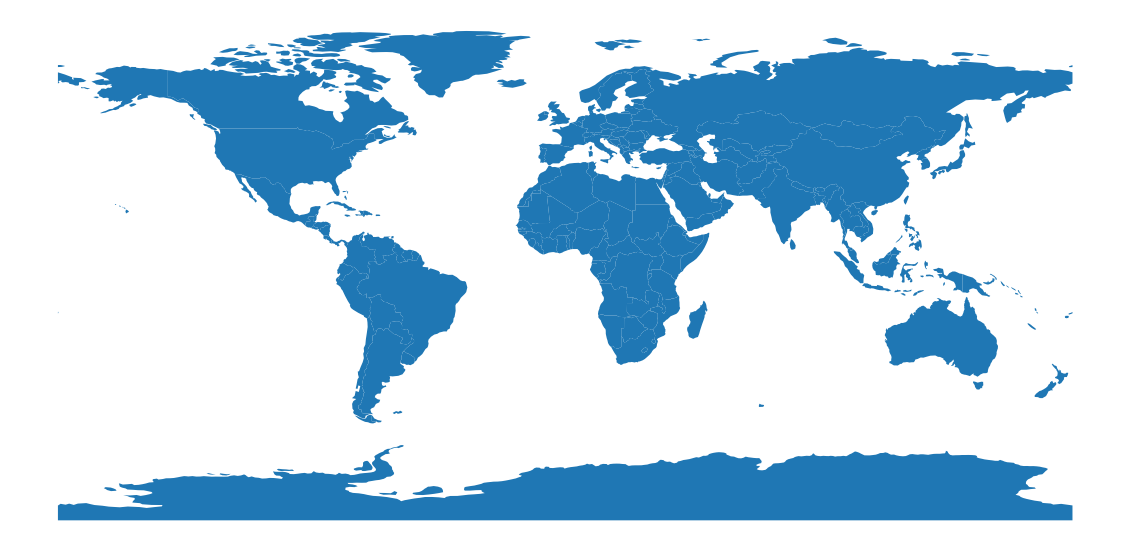

In [54]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world_data.plot(figsize=(20,10))
ax.axis('off')

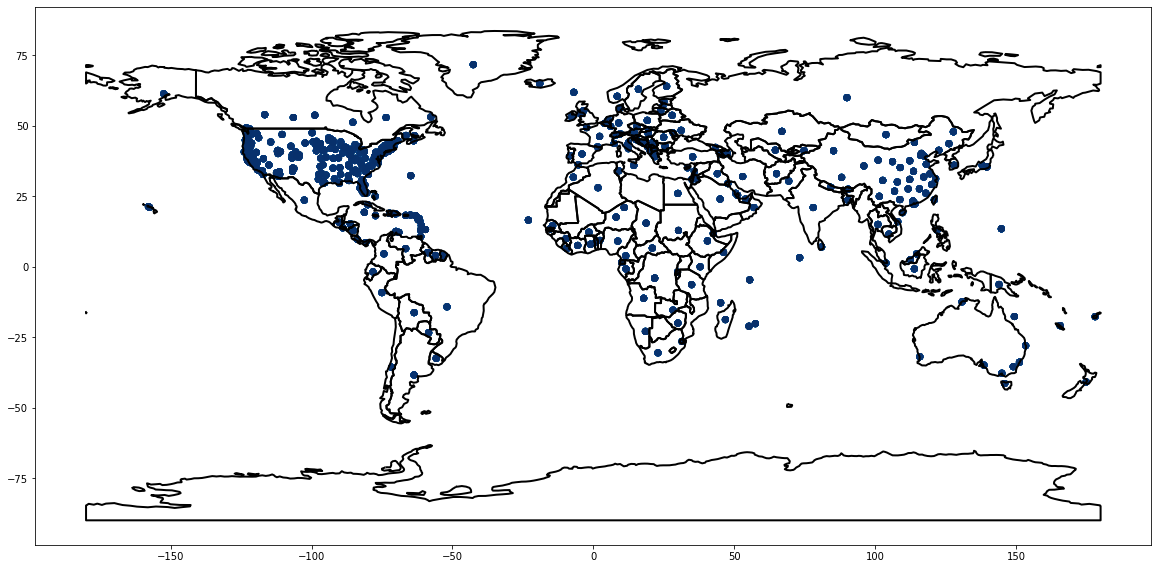

In [55]:
fig,ax = plt.subplots(figsize=(20,10))
geodata.plot(cmap='Blues',ax=ax)
world_data.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [56]:
world_data['continent'].nunique()

8

In [57]:
data['Country/Region'].nunique()

162

In [58]:
data_copy= data

In [59]:
data['CaseDate']= pd.to_datetime(data_copy['Date'])

In [60]:
time_Series= data_copy.set_index('CaseDate')
time_Series

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered,geometry
CaseDate,,,,,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
2020-01-22,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2020-01-22,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
2020-01-22,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
2020-01-22,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)
2020-01-22,British Columbia,Canada,49.2827,-123.1207,1/22/20,0,0,0,POINT (-123.12070 49.28270)
2020-01-22,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0,POINT (151.20930 -33.86880)
2020-01-22,Victoria,Australia,-37.8136,144.9631,1/22/20,0,0,0,POINT (144.96310 -37.81360)
2020-01-22,Queensland,Australia,-28.0167,153.4000,1/22/20,0,0,0,POINT (153.40000 -28.01670)


In [61]:
data_by_date= time_Series.groupby(['CaseDate']).sum().reset_index(drop=None)
data_by_date


,CaseDate,Lat,Long,Confirmed,Death,Recovered
0,2020-01-22,14770.569,-16490.0391,555,17,28
1,2020-01-23,14770.569,-16490.0391,653,18,30
2,2020-01-24,14770.569,-16490.0391,941,26,36
3,2020-01-25,14770.569,-16490.0391,1434,42,39
4,2020-01-26,14770.569,-16490.0391,2118,56,52
5,2020-01-27,14770.569,-16490.0391,2927,82,61
6,2020-01-28,14770.569,-16490.0391,5578,131,107
7,2020-01-29,14770.569,-16490.0391,6166,133,126
8,2020-01-30,14770.569,-16490.0391,8234,171,143
9,2020-01-31,14770.569,-16490.0391,9927,213,222


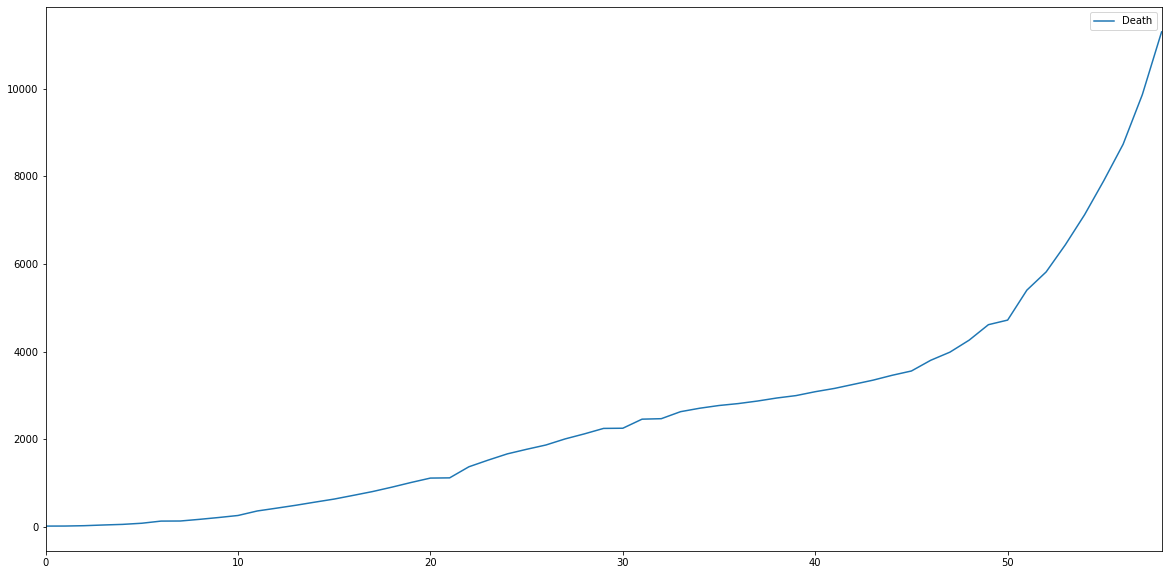

In [62]:
data_by_date[['Death']].plot(kind='line', figsize=(20,10))

In [63]:
#Performing the time series forecastin 
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
data_fb= Prophet()

In [64]:
data_fb.add_seasonality(name="Monthly", period=30.5, fourier_order=3)


In [65]:
data_cases= data_by_date[['CaseDate','Confirmed','Death', 'Recovered']]
data_cases

,CaseDate,Confirmed,Death,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,653,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
5,2020-01-27,2927,82,61
6,2020-01-28,5578,131,107
7,2020-01-29,6166,133,126
8,2020-01-30,8234,171,143
9,2020-01-31,9927,213,222


In [66]:
data_confirmed= data_cases[['CaseDate','Confirmed']]

In [67]:
data_confirmed.shape

(59, 2)

In [68]:
data_confirmed.rename(columns={"CaseDate":"ds","Confirmed":"y" }, inplace= True)

C:\Users\paths\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [69]:
train_confirmed= data_confirmed[:45]
test_confirmed= data_confirmed[45:]

In [70]:
#Fitting the model
data_fb.fit(train_confirmed)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\paths\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [71]:
future_dates= data_fb.make_future_dataframe(periods=60)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [72]:
pred= data_fb.predict(future_dates)

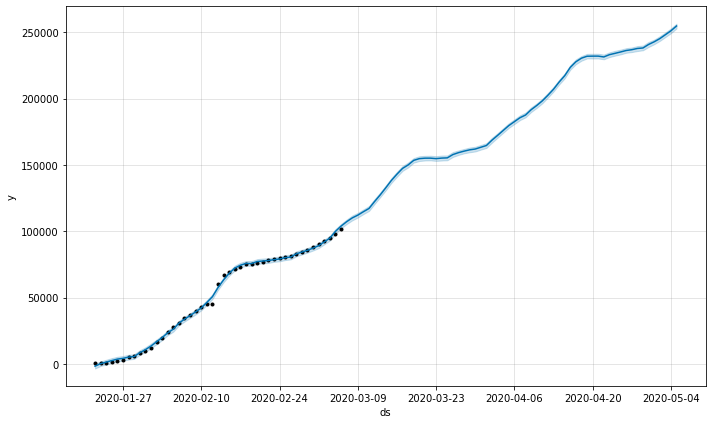

In [73]:
data_fb.plot(pred);

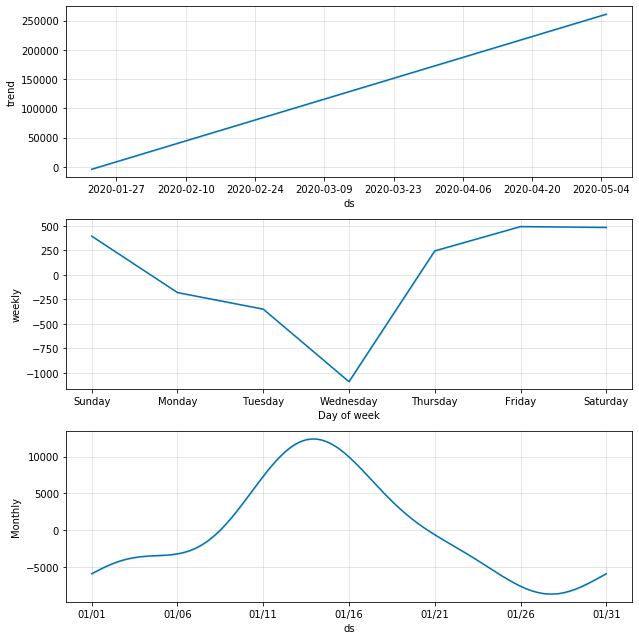

In [74]:
data_fb.plot_components(pred);

In [75]:
test_confirmed['Date']= pd.to_datetime(test_confirmed['ds'])
test_confirmed

C:\Users\paths\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ds,y,Date
45,2020-03-07,105821,2020-03-07
46,2020-03-08,109795,2020-03-08
47,2020-03-09,113561,2020-03-09
48,2020-03-10,118592,2020-03-10
49,2020-03-11,125865,2020-03-11
50,2020-03-12,128343,2020-03-12
51,2020-03-13,145193,2020-03-13
52,2020-03-14,156094,2020-03-14
53,2020-03-15,167446,2020-03-15
54,2020-03-16,181527,2020-03-16


In [76]:
test_confirmed= test_confirmed.set_index('Date')

In [77]:
test_confirmed=test_confirmed['y']

In [78]:
test_confirmed

Date
2020-03-07    105821
2020-03-08    109795
2020-03-09    113561
2020-03-10    118592
2020-03-11    125865
2020-03-12    128343
2020-03-13    145193
2020-03-14    156094
2020-03-15    167446
2020-03-16    181527
2020-03-17    197142
2020-03-18    214910
2020-03-19    242708
2020-03-20    272166
Name: y, dtype: int64

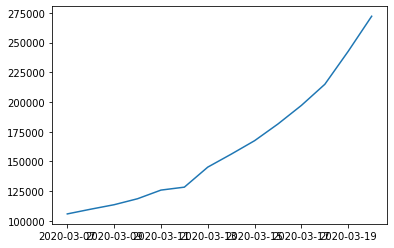

In [79]:
plt.plot(test_confirmed)

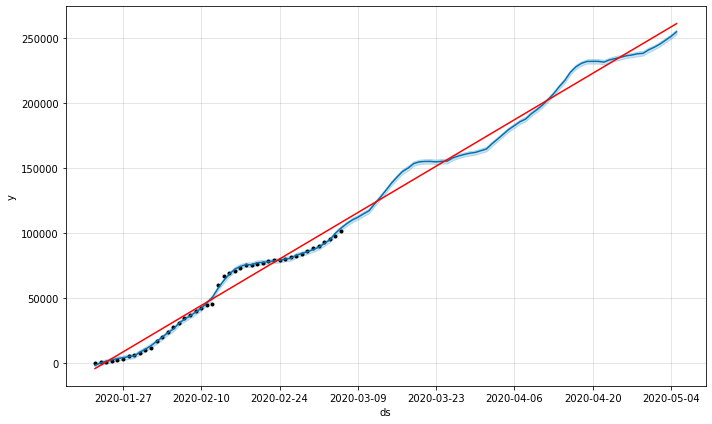

In [80]:
plots= data_fb.plot(pred)
change= add_changepoints_to_plot(plots.gca(),data_fb,pred)